In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2013 data

In [2]:
bechdel2013 = pd.read_csv("~/desktop/bechdel.csv", index_col = 0)
bechdel2013.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,period_code,decade_code
1,2013,tt1711425,21 & Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
2,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
3,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
4,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
5,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


In [3]:
bechdel2013.info() # there are unused columns and null objects in intgross and domgross

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 1 to 1794
Data columns (total 15 columns):
year             1794 non-null int64
imdb             1794 non-null object
title            1794 non-null object
test             1794 non-null object
clean_test       1794 non-null object
binary           1794 non-null object
budget           1794 non-null int64
domgross         1777 non-null float64
intgross         1783 non-null float64
code             1794 non-null object
budget_2013      1794 non-null int64
domgross_2013    1776 non-null float64
intgross_2013    1783 non-null float64
period_code      1615 non-null float64
decade_code      1615 non-null float64
dtypes: float64(6), int64(3), object(6)
memory usage: 224.2+ KB


In [4]:
bechdel2013 = bechdel2013.drop(['imdb', 'test', 'clean_test', 'code', 
                'period_code', 'decade_code'], axis=1) # drop the unused columns
bechdel2013.head()

,year,title,binary,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013
1,2013,21 & Over,FAIL,13000000,25682380.0,42195766.0,13000000,25682380.0,42195766.0
2,2012,Dredd 3D,PASS,45000000,13414714.0,40868994.0,45658735,13611086.0,41467257.0
3,2013,12 Years a Slave,FAIL,20000000,53107035.0,158607035.0,20000000,53107035.0,158607035.0
4,2013,2 Guns,FAIL,61000000,75612460.0,132493015.0,61000000,75612460.0,132493015.0
5,2013,42,FAIL,40000000,95020213.0,95020213.0,40000000,95020213.0,95020213.0


In [5]:
nullobject = pd.isnull(bechdel2013)
print(nullobject.tail(10)) # to see if the null objects are turned into 0
nullobject_i = np.where(nullobject)

       year  title  binary  budget  domgross  intgross  budget_2013  \
1785  False  False   False   False     False     False        False   
1786  False  False   False   False      True      True        False   
1787  False  False   False   False     False     False        False   
1788  False  False   False   False     False     False        False   
1789  False  False   False   False     False     False        False   
1790  False  False   False   False     False     False        False   
1791  False  False   False   False     False     False        False   
1792  False  False   False   False     False     False        False   
1793  False  False   False   False     False     False        False   
1794  False  False   False   False     False     False        False   

      domgross_2013  intgross_2013  
1785          False          False  
1786           True           True  
1787          False          False  
1788          False          False  
1789          False          Fals

In [6]:
bechdel2013.iloc[nullobject_i] = 0 
bechdel2013.tail(10)

,year,title,binary,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013
1785,1973,The Sting,FAIL,5500000,159616327.0,159616327.0,28841418,837011132.0,8.370111e+08
1786,1972,1776,FAIL,4000000,0.0,0.0,22288557,0.0,0.000000e+00
1787,1972,Pink Flamingos,PASS,12000,413802.0,413802.0,66866,2305762.0,2.305762e+06
1788,1972,The Godfather,FAIL,7000000,134966411.0,268500000.0,39004975,752051643.0,1.496119e+09
1789,1971,Escape from the Planet of the Apes,FAIL,2500000,12300000.0,12300000.0,14386286,70780525.0,7.078052e+07
1790,1971,Shaft,FAIL,53012938,70327868.0,107190108.0,305063707,404702718.0,6.168270e+08
1791,1971,Straw Dogs,FAIL,25000000,10324441.0,11253821.0,143862856,59412143.0,6.476027e+07
1792,1971,The French Connection,FAIL,2200000,41158757.0,41158757.0,12659931,236848653.0,2.368487e+08
1793,1971,Willy Wonka & the Chocolate Factory,FAIL,3000000,4000000.0,4000000.0,17263543,23018057.0,2.301806e+07
1794,1970,Beyond the Valley of the Dolls,PASS,1000000,9000000.0,9000000.0,5997631,53978683.0,5.397868e+07


In [7]:
bechdel2013.info() # no null objects

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 1 to 1794
Data columns (total 9 columns):
year             1794 non-null int64
title            1794 non-null object
binary           1794 non-null object
budget           1794 non-null int64
domgross         1794 non-null float64
intgross         1794 non-null float64
budget_2013      1794 non-null int64
domgross_2013    1794 non-null float64
intgross_2013    1794 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 140.2+ KB


In [8]:
# https://www.usinflationcalculator.com/
bechdel2013['budget_2019'] = 1.1 * bechdel2013.budget_2013 
bechdel2013['domgross_2019'] = 1.1 * bechdel2013.domgross_2013
bechdel2013['intgross_2019'] = 1.1 * bechdel2013.intgross_2013

In [9]:
bechdel2013.head()

,year,title,binary,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013,budget_2019,domgross_2019,intgross_2019
1,2013,21 & Over,FAIL,13000000,25682380.0,42195766.0,13000000,25682380.0,42195766.0,14300000.0,28250618.0,46415342.6
2,2012,Dredd 3D,PASS,45000000,13414714.0,40868994.0,45658735,13611086.0,41467257.0,50224608.5,14972194.6,45613982.7
3,2013,12 Years a Slave,FAIL,20000000,53107035.0,158607035.0,20000000,53107035.0,158607035.0,22000000.0,58417738.5,174467738.5
4,2013,2 Guns,FAIL,61000000,75612460.0,132493015.0,61000000,75612460.0,132493015.0,67100000.0,83173706.0,145742316.5
5,2013,42,FAIL,40000000,95020213.0,95020213.0,40000000,95020213.0,95020213.0,44000000.0,104522234.3,104522234.3


In [10]:
bechdel2013['return'] = bechdel2013.intgross_2019 + bechdel2013.domgross_2019 - bechdel2013.budget_2019 # return

In [11]:
bechdel2013.head()

,year,title,binary,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013,budget_2019,domgross_2019,intgross_2019,return
1,2013,21 & Over,FAIL,13000000,25682380.0,42195766.0,13000000,25682380.0,42195766.0,14300000.0,28250618.0,46415342.6,60365960.6
2,2012,Dredd 3D,PASS,45000000,13414714.0,40868994.0,45658735,13611086.0,41467257.0,50224608.5,14972194.6,45613982.7,10361568.8
3,2013,12 Years a Slave,FAIL,20000000,53107035.0,158607035.0,20000000,53107035.0,158607035.0,22000000.0,58417738.5,174467738.5,210885477.0
4,2013,2 Guns,FAIL,61000000,75612460.0,132493015.0,61000000,75612460.0,132493015.0,67100000.0,83173706.0,145742316.5,161816022.5
5,2013,42,FAIL,40000000,95020213.0,95020213.0,40000000,95020213.0,95020213.0,44000000.0,104522234.3,104522234.3,165044468.6


In [12]:
bechdel2013 = bechdel2013[bechdel2013.year == 2013]

In [13]:
bechdel2013.tail()

,year,title,binary,budget,domgross,intgross,budget_2013,domgross_2013,intgross_2013,budget_2019,domgross_2019,intgross_2019,return
96,2013,Turbo,FAIL,135000000,83028130.0,283828130.0,135000000,83028130.0,283828130.0,148500000.0,91330943.0,312210943.0,255041886.0
97,2013,Warm Bodies,FAIL,30000000,66380662.0,116643610.0,30000000,66380662.0,116643610.0,33000000.0,73018728.2,128307971.0,168326699.2
98,2013,We're the Millers,PASS,37000000,150394119.0,270000119.0,37000000,150394119.0,270000119.0,40700000.0,165433530.9,297000130.9,421733661.8
99,2013,White House Down,FAIL,150000000,73103784.0,205440387.0,150000000,73103784.0,205440387.0,165000000.0,80414162.4,225984425.7,141398588.1
100,2013,World War Z,FAIL,190000000,202359711.0,539559711.0,190000000,202359711.0,539559711.0,209000000.0,222595682.1,593515682.1,607111364.2


In [14]:
bechdel2013 = bechdel2013.drop(['budget', 'domgross', 'intgross', 'budget_2013', 'domgross_2013', 'intgross_2013'], axis=1) # drop the unused columns
bechdel2013 = bechdel2013.set_index('title')
bechdel2013.head()

,year,title,binary,budget_2019,domgross_2019,intgross_2019,return
1,2013,21 & Over,FAIL,14300000.0,28250618.0,46415342.6,60365960.6
3,2013,12 Years a Slave,FAIL,22000000.0,58417738.5,174467738.5,210885477.0
4,2013,2 Guns,FAIL,67100000.0,83173706.0,145742316.5,161816022.5
5,2013,42,FAIL,44000000.0,104522234.3,104522234.3,165044468.6
6,2013,47 Ronin,FAIL,247500000.0,42198722.5,160384226.2,-44917051.3


In [15]:
return2013 = pd.DataFrame(bechdel2013.loc[:,['binary', 'return']])
print(return2013.head())
return2013.info()

  binary       return
1   FAIL   60365960.6
3   FAIL  210885477.0
4   FAIL  161816022.5
5   FAIL  165044468.6
6   FAIL  -44917051.3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 100
Data columns (total 2 columns):
binary    99 non-null object
return    99 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


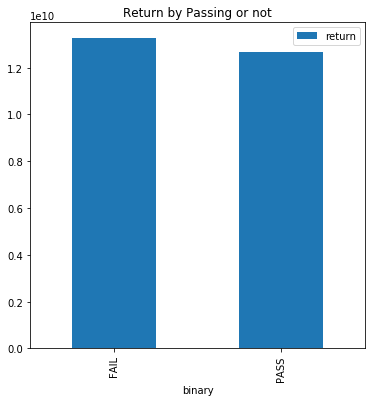

In [16]:
return2013 = return2013.groupby(['binary']).sum()
return2013.plot(kind='bar',stacked=True,figsize=(6,6),title='Return by Passing or not')

In [17]:
bechdel = pd.read_csv("~/desktop/2019 bechdel.csv", index_col = 0, dtype = {'domgross':np.float64})
bechdel.head()

,binary,domgross,intgross,budget,year
film name,,,,,
Aladdin,PASS,355559216.0,682244071.0,182000000.0,2019.0
Alita: Battle Angel,PASS,85710210.0,317261058.0,170000000.0,2019.0
Always Be My Maybe,PASS,NaN,NaN,NaN,2019.0
American Woman,PASS,236637.0,8799.0,NaN,2019.0
Anna,PASS,7743794.0,23174297.0,30000000.0,2019.0


In [18]:
sep = bechdel[['domgross', 'intgross', 'budget']]
ind = sep.dropna(how = 'all').index
bechdel = bechdel.loc[ind,]

In [19]:
bechdel2019 = bechdel[bechdel.year == 2019]
bechdel2016 = bechdel[bechdel.year == 2016]

### 2016 data

In [20]:
bechdel2016.loc[:,'budget_2019'] = 1.07 * bechdel2016.loc[:,'budget']

/Users/wangyihan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/wangyihan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
bechdel2016.loc[:,'domgross_2019'] = 1.07 * bechdel2016.loc[:,'domgross']

In [22]:
bechdel2016.loc[:,'intgross_2019'] = 1.07 * bechdel2016.loc[:,'intgross']

In [23]:
bechdel2016['return'] = bechdel2016.intgross_2019 + bechdel2016.domgross_2019 - bechdel2016.budget_2019

/Users/wangyihan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
bechdel2016.head()

,binary,domgross,intgross,budget,year,budget_2019,domgross_2019,intgross_2019,return
film name,,,,,,,,,
10 Cloverfield Lane,PASS,72082999.0,36203423.0,15000000.0,2016.0,16050000.00,77128808.93,3.873766e+07,99816471.54
10 Days In A Madhouse,PASS,14616.0,NaN,12000000.0,2016.0,12840000.00,15639.12,NaN,NaN
20th Century Women,PASS,5664763.0,1480125.0,5759879.0,2016.0,6163070.53,6061296.41,1.583734e+06,1481959.63
The 5th Wave,FAIL,34912982.0,111336398.0,NaN,2016.0,NaN,37356890.74,1.191299e+08,NaN
The 9th Life of Louis Drax,FAIL,0.0,509487.0,NaN,2016.0,NaN,0.00,5.451511e+05,NaN


### 2019 data

In [25]:
bechdel2019.loc[:,'budget_2019'] = bechdel2019.budget
bechdel2019.loc[:,'domgross_2019'] = bechdel2019.domgross
bechdel2019.loc[:,'intgross_2019'] = bechdel2019.intgross
bechdel2019['return'] = bechdel2019.intgross_2019 + bechdel2019.domgross_2019 - bechdel2019.budget_2019
bechdel2019.head()

/Users/wangyihan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,binary,domgross,intgross,budget,year,budget_2019,domgross_2019,intgross_2019,return
film name,,,,,,,,,
Aladdin,PASS,355559216.0,682244071.0,182000000.0,2019.0,182000000.0,355559216.0,682244071.0,855803287.0
Alita: Battle Angel,PASS,85710210.0,317261058.0,170000000.0,2019.0,170000000.0,85710210.0,317261058.0,232971268.0
American Woman,PASS,236637.0,8799.0,NaN,2019.0,NaN,236637.0,8799.0,NaN
Anna,PASS,7743794.0,23174297.0,30000000.0,2019.0,30000000.0,7743794.0,23174297.0,918091.0
Annabelle Comes Home,PASS,74152591.0,154400000.0,NaN,2019.0,NaN,74152591.0,154400000.0,NaN
